<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Douglas Fabian Paris Merin & Noe Alejando Salinas Gandara.

**Fecha:** 03 de marzo del 2020.

**Expediente** : 714977 & 714748.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clase10 MetodoAceptacionRechazo

## Resolver los siguientes problemas:

### Ejercicio 1: 
>Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.


#### Código de solución 
Para facilitar la demostracion, pasare diviendo el $P_{(k)}$ de forma que nos queda 


\begin{equation*}
\begin{aligned}
\frac{P_{k+1}}{P_{k}} &= \frac{\lambda}{k+1} \\
\newline
P_{k+1} &= \frac{\lambda^{k+1} ~ e^{-\lambda}}{k+1!}\\
\newline
P_k &= \frac{\lambda^k e^{-\lambda}}{k!}\\
\newline
\frac{P_{k+1}}{P_k} &= \frac{\frac{e^{-\lambda}\lambda^{k+1}}{k+1!}}{\frac{e^{-\lambda}\lambda^k}{k!}}\\
\newline
&= \frac{k!~\underline{e^{-\lambda}}{\lambda^{k}+1}}{k+1!~\underline{e^{-\lambda}}\lambda^k}\\
\newline
&= \frac{k!~\underline{\lambda^{k+1}}}{k+1!~\underline{\lambda^k}}\\
\newline
&= \frac{k!~\lambda}{k+1!}\\
\newline
&= \frac{\underline{k!}~\lambda}{(k+1) \underline{k!}}\\
\newline
&= \frac{~\lambda}{(k+1)} = \frac{P_{k+1}}{P_{k}}
\end{aligned}
\end{equation*}

In [1]:
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%matplotlib inline

def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'= True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
#     print(len(y),len(x))
    plt.legend()
    plt.show()
    
# Función que calcula la probabilidad acumulada optimizada
def P_acum_posson_o(k,lamb):
    Pr = np.zeros(k)
    Pr[0] = np.exp(-lamb)
    def pr(i):
        nonlocal Pr
        c  = lamb/(i+1)
        Pr[i+1]=c*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)


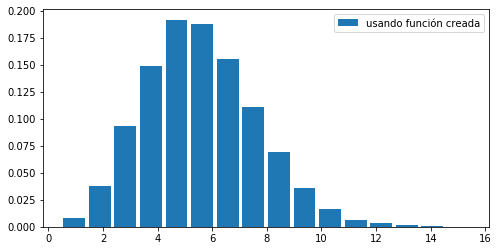

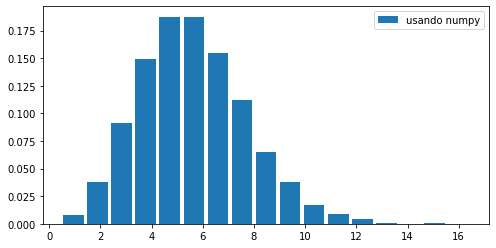

In [2]:
# def D_binomial_intermedia(n,p,N):
k = 10000; lamb = 5; N = 10**4

p_acum = P_acum_posson_o(k,lamb)
u = np.random.rand(N)

# Usando el método de la ecuacion recursiva
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'usando función creada')

# Usando numpy
d_bino_numpy = np.random.poisson(lamb,N)
plot_histogram_discrete(d_bino_numpy,'usando numpy')

## Ejercicio 2
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada.

In [3]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()



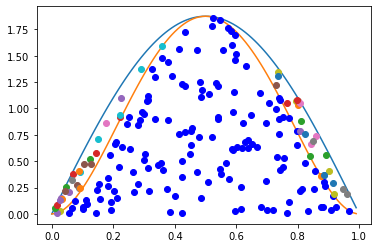

In [7]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
a = 5
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.sin(x*np.pi) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones

plt.plot(x,t(x))
plt.plot(x,f(x))
Acep_rechazo(R2,R1,f,t)
